# Plotting

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pyproj
import datetime
from shapely.geometry import Point
pd.set_option('display.max_rows', 2300)
from geopandas import GeoDataFrame
import pylab as pl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
df = pd.read_csv('Ratio_Uber_to_Green_Yellow_6months.csv', usecols=[1,2])
df['BoroCT2010'] = df['BoroCT2010'].apply(int)
df.head(3)

,BoroCT2010,rate
0,3030200,0.177971
1,4105900,0.165592
2,4091602,0.163810


In [3]:
ctracts = gpd.GeoDataFrame.from_file('nyct2010.shp')
ctracts = ctracts[['BoroCT2010', 'geometry']]
ctracts['BoroCT2010'] = ctracts['BoroCT2010'].apply(int)
ctracts.head(3)

,BoroCT2010,geometry
0,5000900,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,1009800,"POLYGON ((994133.507019043 214848.8975830078, ..."
2,1010000,"POLYGON ((993108.3057861328 216013.1307983398,..."


In [4]:
geo_df = df.merge(ctracts)
geo_df = GeoDataFrame(geo_df, crs = {'init': 'EPSG:2263'}, geometry = geo_df['geometry'])

In [5]:
geo_df.head(3)

,BoroCT2010,rate,geometry
0,3030200,0.177971,"POLYGON ((988132.6987915039 155849.4442138672,..."
1,4105900,0.165592,"POLYGON ((1038593.459228516 221913.3550415039,..."
2,4091602,0.163810,"POLYGON ((1017720.411193848 143977.1650390625,..."


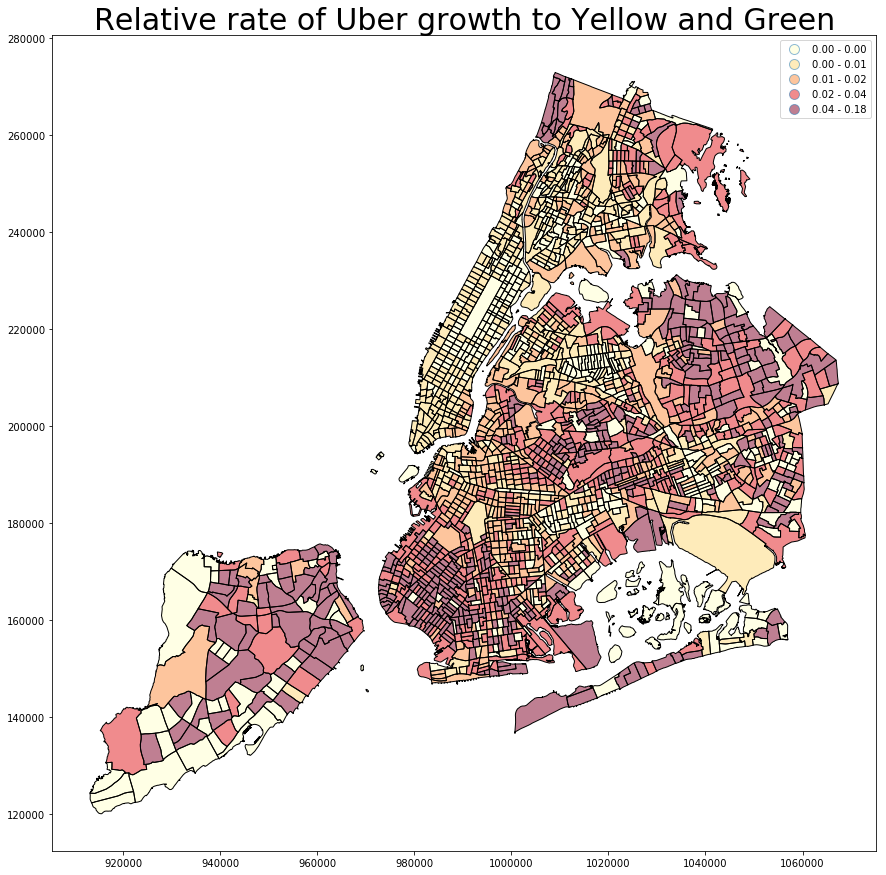

In [6]:
# Pickups choropleth map
fieldname = 'rate'
df = geo_df

plot1 = df.plot(column=fieldname, cmap='YlOrRd', scheme = 'Quantiles', legend = True, k = 5, figsize = (15, 15))
title = 'Relative rate of Uber growth to Yellow and Green'

plt.title(title, fontsize = 30)
plt.savefig('Ratio_Uber_to_Green_Yellow_6months', dpi = 500)

In [7]:
#geo_df = geo_df.sort_values('rate', ascending=False)

In [8]:
#geo_df.head(5)

In [9]:
#geo_df.to_csv('Ratio_Uber_to_Green_Yellow_6months.csv')